## 

In [3]:
import os
%matplotlib inline
import sys
from collections import Counter
from typing import List

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# TextRank
from gensim.summarization.summarizer import summarize

In [ ]:
# kiwi: Tokenizer
from kiwipiepy import Kiwi
# keyBert
from keybert import KeyBERT
from transformers import BertModel

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
module_path = '/'.join(os.getcwd().split("\\")[:-1])
sys.path.append(module_path)
sys.path.append(module_path + '/crawling')

## data 전처리

### Tokenize

In [ ]:
kiwi = Kiwi()

In [ ]:
# 명사 추출 함수
def noun_extractor(text):
    results = []
    result = kiwi.analyze(text)
    # print(result)
    for token, pos, _, _ in result[0][0]:
        if len(token) != 1 and pos.startswith('N') or pos.startswith('SL'):
            results.append(token)
    return results

### 불용어 제거

#### stopword: list

In [ ]:
stopwords = [
    # channel
    "11번가",
    "11st-tech",
    "29CM",
    "29cm",
    "AWS",
    "amazon",
    "class101",
    "GS리테일",
    "gsretail",
    "NHN",
    "nhncloud",
    "ToastUI",
    "네이버D2",
    "d2",
    "naver",
    "네이버클라우드",
    "naver-cloud-platform",
    "네이버플레이스",
    "naver-place-dev",
    "넷마블",
    "netmarble",
    "다나와",
    "danawalab",
    "당근마켓",
    "daangn",
    "데보션",
    "devocean",
    "sk",
    "데브시스터즈",
    "devsisters",
    "드라마앤컴퍼니",
    "dramancompany",
    "라인",
    "linecorp",
    "레모네이드",
    "lemonade-engineering",
    "롯데on",
    "lotteon",
    "루닛",
    "lunit",
    "마이리얼트립",
    "myrealtrip-product",
    "메가존클라우드",
    "ctc-mzc",
    "무신사",
    "musinsa",
    "버즈빌",
    "buzzvil",
    "브랜디",
    "brandi",
    "사람인",
    "saramin",
    "숨고",
    "soomgo",
    "스마일게이트AI",
    "smilegate",
    "스케터랩",
    "scatterlab",
    "스타일쉐어",
    "styleshare",
    "쏘카",
    "socarcorp",
    "아이디어스",
    "idus",
    "야놀자",
    "yanolja",
    "야놀자클라우드",
    "yanoljacloud-tech",
    "엔라이즈",
    "nrise",
    "여기어때",
    "gccompany",
    "오일나우",
    "왓챠",
    "watcha",
    "요기요",
    "yogiyo",
    "우아한형제들",
    "woowahan",
    "원티드",
    "wantedjobs",
    "지마켓",
    "gmarket",
    "직방",
    "zigbang",
    "카카오",
    "kakao",
    "카카오엔터프라이즈",
    "kakaoenterprise",
    "카카오페이",
    "kakaopay",
    "컬리",
    "kurly",
    "코인원",
    "coinone",
    "쿠팡",
    "coupang-engineering",
    "크몽",
    "kmong",
    "클라우드메이트",
    "cloudmt",
    "테이블링",
    "tabling",
    "토스",
    "toss",
    "포스타입",
    "postype",
    "하이퍼커넥트",
    "hyperconnect",
    "헤이딜러",
    "prnd",
    "화해",
    "hwahae",
]

# most_common(200) 불용어 추가
stopwords.extend([
    '사용', '개발자', '사용자', '기반', '프로젝트', '이용', '코드', '기술', '서비스', '활용', '적용', '개발', '소개', '실행', '안녕하세요', 'line', '진행', '관리', '과정', 'developer', '비즈니스', '프로그래밍', '회사', '소프트웨어', '유저',   '프로그램', 'user',  'service',  '포스팅', 'tech',  '다운로드', '저장소', 'google', '동료',  'project', '방법',  'japanese', 'code', '효율', '도구', '공유', '코딩', '관련', '제품', '이미지', '화면', '얘기', '접근', '광고', '리멤버', '대화', '조직', '링크', '컴퍼니', '오픈', '엔지니어', '문서', 'post', '태그', 'hwang', '예산', '가시', '바탕', 'part', '자료', '버즈빌', '스타트업',
])

#### stopword: from DB

In [ ]:
# from crawling import config
# #  from src.crawling.config import connect, close

# conn = config.connect()
# curs = conn.cursor()

# channel_sql = """select name from channel group by name"""
# curs.execute(channel_sql)
# channel_info = curs.fetchall()

# channels = []
# for channel in channel_info:
#     channels.extend(channel)
# print(channels)

# config.close()

# stopwords.extend(channels)

## keyword 추출

In [ ]:
def keyword_extractor(bert:str, documents:List[str]): # -> (List[Tuple[str, float]] | List[List[Tuple[str, float]]]):
  model = BertModel.from_pretrained(bert)
  model = model.cuda()
  kw_model = KeyBERT(model)
  keywords = kw_model.extract_keywords(documents, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=20)
  return keywords
# model_100langs = BertModel.from_pretrained('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')
# kw_model_100langs = KeyBERT(model_100langs)
# keywords_100langs = kw_model_100langs.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=20)


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
# gpu 사용법
# https://github.com/MaartenGr/KeyBERT/issues/108
# model = SentenceTransformer(
#     "<hf_model_name>",
#     device="cuda:0"
# )
model = BertModel.from_pretrained('skt/kobert-base-v1')
model = model.cuda()
print("DEVICE", model.device)
# hf_model = KeyBERT(model)

# https://www.kaggle.com/code/accountstatus/shopee-competition-using-bert-model


DEVICE cuda:0


In [ ]:
# print(os.getcwd())
# base_path = "/content/drive/MyDrive/쳇, 6pt: 비스킷(biskuit)/dataset/content/"
import csv
import re

base_path = '../../../data/content/'
csv_path = '../../data/crawling_data_keyword.csv'

f = open(csv_path, "r", encoding="utf-8")

csvReader = csv.reader(f)

def extract_keyword(base_path:str):
    documents = []
    titles = []
    susseed = 0
    fileNotFoundError = 0
    osError = 0
    for row in tqdm(csvReader):
        if len(row) == 0:
            continue
        title = row[1]
        created_date = row[3]
        channel = row[2]
        # categories = row[4].split()
        # "Design", "Product", "Culture", "Conference" 태그만 달려있는 글 분석 제외
        # if len(categories) != 0 and len(set(categories) - set(["Design", "Product", "Culture", "Conference"])) == 0: continue
        file_name = re.sub('[\/:*?"<>|],', "", channel + '_' + title)
        content_path = base_path + created_date + '/' + file_name + '.txt'
        try:
            file = open(content_path, 'r', encoding='utf-8')
        except FileNotFoundError:
            fileNotFoundError += 1
            continue
        except OSError:
            osError += 1
            continue
        text = file.read()
        if len(text.split('\n')) > 50:
            summary = summarize(text)
        else:
            summary = text
        # nouns = noun_extractor(text)
        nouns = noun_extractor(summary)
        print(nouns)
        text = ' '.join(nouns)
        documents.append(text)
        titles.append(title)
        susseed += 1
    print("susseed:", susseed)
    print("fileNotFoundError:", fileNotFoundError)
    print("osError:", osError)
    return keyword_extractor('skt/kobert-base-v1', documents)

In [ ]:
extracted_keywords = extract_keyword(base_path)

0it [00:00, ?it/s]

susseed: 1636
fileNotFoundError: 1599
osError: 196


In [ ]:
extracted_keywords

NameError: name 'extracted_keywords' is not defined

['사용', '개발자', '사용자', '기반', '데이터', '프로젝트', '이용', '코드', '기술', '서버', '서비스', '활용', '설정', '구현', '플랫폼', '적용', '개발', '배포', '소개', '모델', '정보', '처리', '구성', '학습', '실행', 'data', 'cloud', '안녕하세요', '기능', '저장', '라이브러리', '버전', '이전', 'server', '시스템', '운영', 'line', '진행', '관리', '과정', '모델링', '애플리케이션', 'db', 'developer', '분석', '인프라', '비즈니스', '모니터링', 'app', '프로그래밍', '모듈', '설치', '언어', '연결', '영상', '개선', 'model', '회사', 'android', '소프트웨어', '협업', '알고리즘', '유저', '데이터베이스', '테스트', 'github', 'platform', 'web', '파일', '프로그램', 'user', 'learning', '클라우드', 'service', '요청', '포스팅', 'tech', '클래스', '다운로드', '저장소', 'google', '동료', '검색', '업로드', '보안', '디자인', '사이트', '페이지', '구축', 'project', '방법', 'chatgpt', '메시지', '내용', '전송', 'japanese', 'code', '효율', '도구', 'system', '최신', '프로토콜', 'application', 'ai', '접속', '공유', '코딩', '관련', '제품', 'apache', '이미지', '화면', '얘기', '안드로이드', '접근', 'database', '광고', '네트워크', 'json', '리멤버', 'framework', '대화', '타입', '조건', '통신', 'repository', '조직', 'config', '설계', 'storage', '실시간', '링크', '컴퍼니', '성능', '클릭', '검증

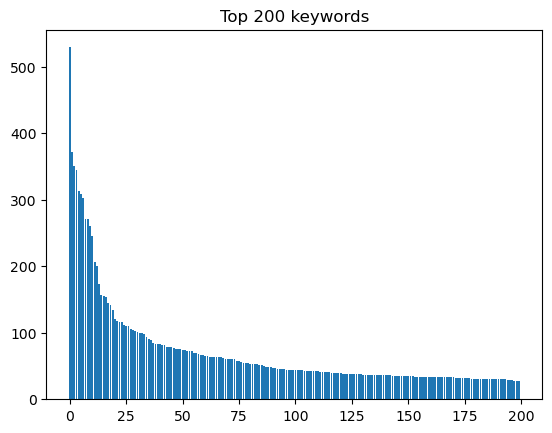

In [ ]:
from matplotlib import pyplot as plt


all_keywords = []
for keyword in extracted_keywords:
    all_keywords.extend(map(lambda x: x[0], keyword))
counter = Counter(all_keywords)
print(list(map(lambda x:x[0], counter.most_common(200))))
plt.title('Top 200 keywords')
plt.bar(range(200), list(map(lambda x: x[1], counter.most_common(200))))
plt.show()

#### legacy

In [4]:
# dfs로 탐색해서크롤링

def extract_keyword2(base_path:str):
  content_dir_list = os.scandir(base_path)
  documents = []
  for content_dir in content_dir_list:
      if not content_dir.is_dir(): continue
      content_list = os.scandir(content_dir)
      for content in content_list:
          if not content.is_file(): continue
          file = open(content.path, "r")
          if len(text.split('\n')) > 50:
            summary = summarize(text)
          else:
            summary = text
          # nouns = noun_extractor(text)
          nouns = noun_extractor(summary)
          text = ' '.join(nouns)
          documents.append(text)
  # print(text)
  keyword_extractor('skt/kobert-base-v1', documents)
  # keyword_extractor('paraphrase-multilingual-MiniLM-L12-v2', documents)   # multilingual!
  # keyword_extractor('paraphrase-multilingual-mpnet-base-v2', documents)   # 시간 더 오래걸리고 결과 더 조음!